# Tensorflow Quickstart

## Import Tensorflow

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.9.1'

## Import Dataset

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 [==============================] - 5s 0us/step


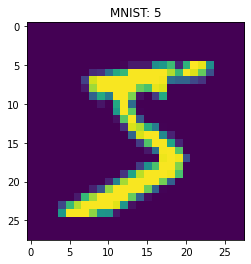

In [11]:
plt.title(f"MNIST: {y_train[0]}")
plt.imshow(X_train[0])

In [16]:
labels = np.unique(y_train)

## Build Model
This model returns a vector of logits, or non-normalized predictions; they are usually fed into a `Softmax` layer to generate probabilities. 

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(labels))
])

`SparseCategoricalCrossentropy` takes a vector of logits. The loss is equal to the negative log probability of the true class and 0 if the model is sure of the correct class.

In [21]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [20]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 7ms/step - loss: 0.2983 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1450 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1048 - accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0875 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0758 - accuracy: 0.9755


## Evaluate Model

In [22]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0803 - accuracy: 0.9763 - 2s/epoch - 7ms/step


[0.08027293533086777, 0.9763000011444092]

## Build Probability Model 

In [25]:
probability_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [58]:
probabilities = probability_model(np.array([X_test[0]]))
print(labels[np.argmax(probabilities)]) # print max probability
print(y_test[0]) # print actual label

7
7


## Confusion Matrix

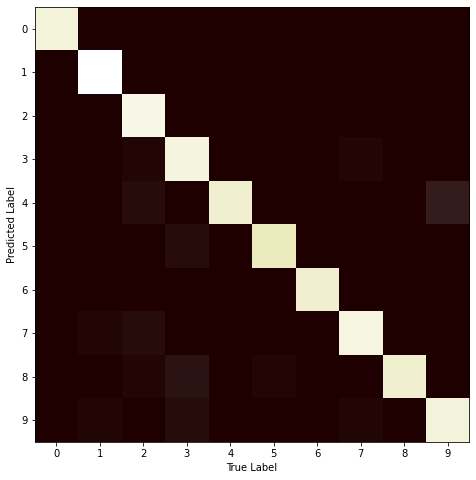

In [59]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(probability_model(X_test).numpy(), axis=1)
cmatrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
plt.yticks(labels)
plt.xticks(labels)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.imshow(cmatrix, cmap="pink")